## 5.2 선 그래프

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 5.2.1  종류
- '-' : 실선
- '--' : dash선
- '-.' : dash-dot선
- '.' : 점선

In [2]:
x = np.linspace(0,10,11)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

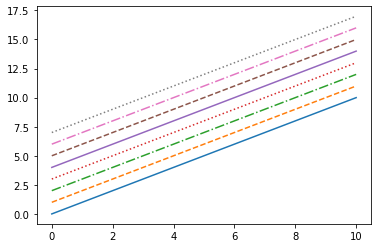

In [3]:
fig = plt.figure()
ax = plt.axes()

plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+3, linestyle='dotted')

# For short, you can use the following codes
plt.plot(x, x+4, linestyle='-') # solid
plt.plot(x, x+5, linestyle='--') # dashed
plt.plot(x, x+6, linestyle='-.') # dashdot
plt.plot(x, x+7, linestyle=':') # dotted

### 5.2.2 직선 그래프
- y = ax+b 형태의 직선이나 y=h 형태의 가로선 혹은 x=v 형태의 세로선
- plt.plot(x축, 회귀식, data=데이터, c='color')
- plt.hlines(y, xmin, xmax)
- plt.vlines(x, ymin, ymax)

[예제] 
- fifa 데이터에서 passing과 overall 사이의 선형회귀모형을 생성한 뒤, 직선 그래프로 표현하기
- 선형 회귀식에 대한 그래프는 passing과 overall에 대한 산점도 위에 나타내며, 색상은 빨강으로 지정하여 표현
- overall의 중위수는 수평선, passing의 중위수는 ㅜㅅ직선으로 그리되 각각의 선은 점 스타일의 회색 선으로 지정

In [4]:
fifa = pd.read_csv('data/players_20.csv')
feature = ['sofifa_id', 'short_name', 'passing', 'overall']
fifa = fifa[feature].head(100)
fifa.dropna(inplace=True)
fifa.head()

,sofifa_id,short_name,passing,overall
0,158023,L. Messi,92.0,94
1,20801,Cristiano Ronaldo,82.0,93
2,190871,Neymar Jr,87.0,92
4,183277,E. Hazard,86.0,91
5,192985,K. De Bruyne,92.0,91


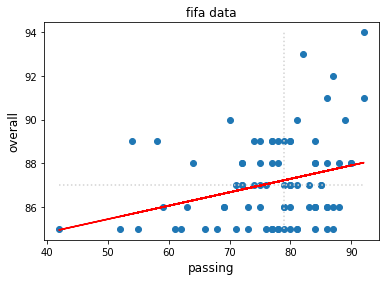

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 회귀모델 선언
x = fifa[['passing']]
lr.fit(x, fifa['overall']) # 회귀모델 생성

plt.scatter(fifa['passing'], fifa['overall']) # 원ㄷ ㅔ이터 산포도
plt.plot(fifa['passing'], lr.predict(x), c='r', linestyle='-') # 회귀직선
plt.hlines(np.median(fifa['overall']), np.min(fifa['passing']), np.max(fifa['passing']), 'lightgrey', linestyles=':')
plt.vlines(np.median(fifa['passing']), np.min(fifa['overall']), np.max(fifa['overall']), 'lightgrey', linestyles=':')

plt.xlabel('passing', fontsize=12)
plt.ylabel('overall', fontsize=12)
plt.title('fifa data')
plt.show()

### 5.2.3 곡선 그래프

[예제]

평균이 0이고 표준편차가 1인 확률밀도함수를 생성하고 그래프로 나타내기  
x축의 범위는 -3 ~ +3 으로 한다

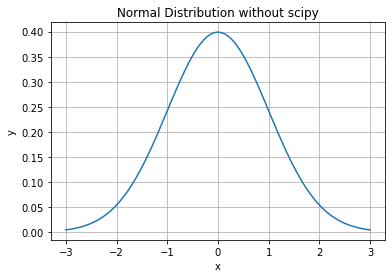

In [6]:
import scipy.stats as stats

# np.linspace(min, max, cnt) : 지정된 간격 동안 균등한 간격의 숫자를 반환
# -3에서 3까지 100등분하여 값을 지정함
x = np.linspace(-3, 3, 100)
# stats.norm(mean, sd) : 확률밀도를 계산해주는 함수
y = stats.norm(0, 1).pdf(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel("y")
plt.grid()
plt.title('Normal Distribution without scipy')
plt.show()

In [7]:
len(x)

100

In [8]:
len(y)

100

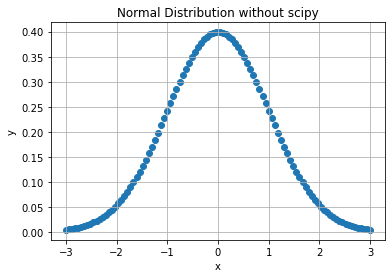

In [9]:
import scipy.stats as stats

# np.linspace(min, max, cnt) : 지정된 간격 동안 균등한 간격의 숫자를 반환
# -3에서 3까지 100등분하여 값을 지정함
x = np.linspace(-3, 3, 100)
# stats.norm(mean, sd) : 확률밀도를 계산해주는 함수
y = stats.norm(0, 1).pdf(x)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel("y")
plt.grid()
plt.title('Normal Distribution without scipy')
plt.show()

### 5.2.4 꺾은선 그래프
여러 범주에 대한 관측값을 비교하거나 시간의 흐름에 따른 데이터에서 추세를 파악하기 위해 사용  
(중요) X축은 정렬되어 있어야 함

- plt.plot(x축, y축, data=데이터, ls='-/--/-./:', lw=int_value, c='color') # ls: 선 스타일, lw: 선 굵기
- plt.legend(['항목 이름1', '항목이름2'])

[예시] Cars93에서 Wheelbase 따른 Type별 Price의 관측값을 살펴보자

In [11]:
cars = pd.read_csv('data/Cars93.csv')
cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [12]:
cars.Wheelbase.value_counts()

103    9
97     7
98     6
105    5
101    5
110    5
113    5
104    5
111    5
102    4
99     3
96     3
93     3
106    3
108    3
94     3
115    2
112    2
114    2
116    2
90     2
109    2
107    2
100    2
95     1
117    1
119    1
Name: Wheelbase, dtype: int64

In [14]:
## 선형 그래프를 그릴 때에는 X축 정렬을 해줘야 함
car_type = cars.Type.unique()
car_type

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [15]:
car_sorted = cars.sort_values(by=['Horsepower'])
car_sorted.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
38,Geo,Metro,Small,6.7,8.4,10.0,46,50,None,Front,...,4,151,93,63,34,27.5,10,1695,non-USA,Geo Metro
30,Ford,Festiva,Small,6.9,7.4,7.9,31,33,None,Front,...,4,141,90,63,33,26.0,12,1845,USA,Ford Festiva
82,Suzuki,Swift,Small,7.3,8.6,10.0,39,43,None,Front,...,4,161,93,63,34,27.5,10,1965,non-USA,Suzuki Swift
79,Subaru,Justy,Small,7.3,8.4,9.5,33,37,None,4WD,...,4,146,90,60,32,23.5,10,2045,non-USA,Subaru Justy
72,Pontiac,LeMans,Small,8.2,9.0,9.9,31,41,None,Front,...,4,177,99,66,35,25.5,17,2350,USA,Pontiac LeMans


In [16]:
cars.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

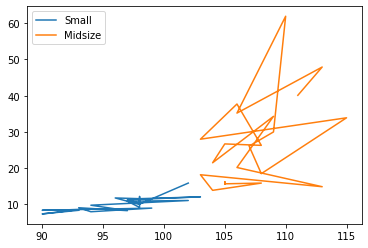

In [18]:
plt.plot('Wheelbase', 'Price', data=car_sorted.loc[car_sorted['Type']=='Small'])
plt.plot('Wheelbase', 'Price', data=car_sorted.loc[car_sorted['Type']=='Midsize'])

plt.legend(car_type)
plt.show()